## Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
plt.style.use('ggplot')

In [2]:
def rabbit_fox_env(x0, y0, α, β, γ, δ, dt = 1e-3, len_t = 100):
    '''
    Simple loteka-volterra differential equation model - see https://en.wikipedia.org/wiki/Lotka–Volterra_equations
    for details of the underlying assumptions.
    
    ------
    Parameters:
    x0 (int): initial value for prey (Rabbits)
    y0 (int): initial value for Predator (Foxes)
    α  (float): intrinsic rate of prey population increase
    β  (float): predation rate coefficient
    γ  (float): predator mortality rate  
    δ  (float): reproduction rate of predators per prey eaten
    dt (float): time interval between events
    len_t (int): # of events
    ------------
    Returns:
    rabbit (list of floats): # of rabbits at time t
    fox (list of floats): # foxes at time t
    t (numpy array):  time intervals 
    x0 (int): initial value for prey (Rabbits)
    y0 (int): initial value for Predator (Foxes)
    
    '''
    rabbit = []; fox = []
    rabbit.append(x0); fox.append(y0) 
    t = np.arange(0, len_t, dt)
    for idx, _ in enumerate(t):
        if (idx == 0):
            continue
        r = rabbit[-1] ; f = fox[-1]
        # The term β * (f * r)  - reminds a binomial experiment.  
        rabbit.append(r + dt * (α * r - β * (f * r)))
        fox.append(f + dt * (δ * (f * r) - γ * f))
    return rabbit, fox, t, x0, y0

In [3]:
def multi_init_rabbit_fox_env(xs, ys, α, β, γ, δ):
    '''
    ------------
    Parameters:
    xs (list of int): initial values for prey (Rabbits)
    ys (list of int): initial values for Predator (Foxes)
    α  (float): intrinsic rate of prey population increase
    β  (float): predation rate coefficient
    γ  (float): reproduction rate of predators per 1 prey eaten
    δ  (float): predator mortality rate
    -----------
    Returns:
    rabbits (list of lists): 
    foxes (list of lists):
    xs (list of int): initial values for prey (Rabbits)
    ys (list of int): initial values for Predator (Foxes)
    
    '''
    rabbits = []
    foxes = []
    for x0, y0 in zip(xs, ys):
        rabbit, fox, t, x0, y0 = rabbit_fox_env(x0, y0, α, β, γ, δ)
        rabbits.append(rabbit)
        foxes.append(fox)
    
    
    return rabbits, foxes, xs, ys

In [4]:
def multi_phase_plot_rabbit_fox(rabbits, foxes, xs, ys):
    '''
    Phase plot for foxes and rabbits model.
    -------------------
    Parameters:
    rabbits (list of lists of floats): first output from rmulti_init_rabbit_fox_env
    foxes (list of lists of floats): second output from multi_init_rabbit_fox_env
    xs (list of int): initial value for prey (Rabbits)
    ys (list of int): initial value for Predator (Foxes)
    -------------------
    '''
    fig, ax = plt.subplots(figsize=(9,5))
    ax.set_xlabel('Rabbit population')
    ax.set_ylabel('Fox population')
    ax.set_title('Phase space of Rabbits vs. Foxes population')
    ## Phase space is a plot ignoring time, so we only care what will be
    ## the rabbits vs. foxes population. 
    ## "This corresponds to eliminating time from the two differential equations above to produce a single differential equation"
    for rabbit, fox, x0, y0 in zip(rabbits, foxes, xs, ys):
        ax.scatter(rabbit, fox, label = "init prey: {}, pred: {}".format(str(x0), str(y0)))
    ax.legend()
    plt.show()

#### Input variables:

In [5]:
α, β, γ, δ = 1.1, 0.4, 0.4, 0.1
xs = [10, 10, 20, 15]
ys = [10, 20, 5, 5] 

In [6]:
rabbits, foxes, xs, ys = multi_init_rabbit_fox_env(xs, ys, α, β, γ, δ)

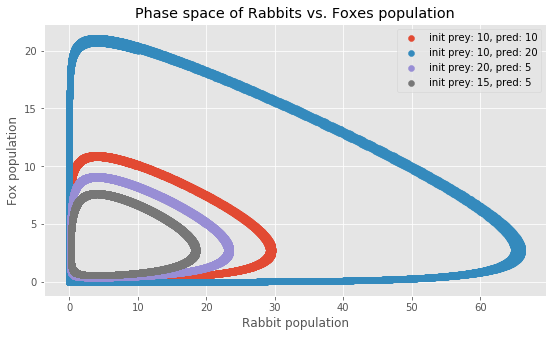

In [7]:
multi_phase_plot_rabbit_fox(rabbits, foxes, xs, ys)

Assumptions:

 - The prey population finds ample food at all times.
 - The food supply of the predator population depends entirely on the size of the prey population.
 - The rate of change of population is proportional to its size.
 - During the process, the environment does not change in favour of one species, and genetic adaptation is inconsequential.
 - Predators have limitless appetite.

In [ ]:
rabbit = []
fox = []

In [ ]:
# reproduction rate per 1 prey eaten
γ = np.random.beta(1, 10)

In [ ]:
for idx, _ in enumerate(t, start=1):
    rab_growth = growth_abs(rabbit, idx, δ) 
    rab_mort = mort_prey(probs, θ, idx, rabbit, fox) 
#     swan = green_swan(rabbit[idx - 1]) 
    
    
    rabbit.append(rabbit[idx - 1]
                  + rab_growth
                  - rab_mort)
#                   - swan)
    
    
    fox_rep = reproduce(γ, rab_mort)
    fox_mort = spieces_mort(fox, idx, χ)
#   fox_swan = green_swan(fox[idx - 1]) 
 
    fox.append(fox[idx - 1]   
               + fox_rep
               - fox_mort)
#                - fox_swan)

In [ ]:
def reproduce(γ, mort_p, foxes):
    '''
    
    ---------------------
    Parameters:
    γ (float): constant reproduction rate per prey eaten 
    mort_p (int): # rabbits  eaten at a previous timestamp t - i
    foxes (int):  # foxes at timestamp t 
    ---------------------
    Returns:
    int additional foxes 
    
    '''
    if (foxes <= 1):
        return 0
    else: 
        ## assume every fox gets equal share from prey
        return np.random.binomial(np.floor(foxes / 2), 2 * mort_p * γ)

In [ ]:
# def green_swan(n, a = 1.5, m = 1):
#     '''
    
#     '''
#     s = (np.random.pareto(a, 50000) + 1) * m
#     s1 = (np.random.pareto(a, 1) + 1) * m
#     if (s1 > max(s)): 
#         print('SWAN!')
#     return  np.random.binomial(n, np.random.uniform(0.5, 0.9)) if s1 > max(s) else 0

In [ ]:
def spieces_mort(a, idx, θ):
    '''
    -----------------------
    Parameters:
    a : 
    idx:
    θ:
    -----------------------
    
    '''
    n = 0 if a[idx - 1] < 0 else a[idx - 1]
    return np.random.binomial(n, θ)  

In [ ]:
def mort_prey(probs, θ, idx, rabbit, fox):
    '''
    
    '''
    n = 0 if fox[idx - 1] < 0 else fox[idx - 1]
    mingled_foxes = np.random.binomial(n, probs[idx - 1])
    return mingled_foxes * spieces_mort(rabbit, idx, θ)

In [ ]:
def growth_abs(rabbit, idx, δ):
    '''
    
    '''
    n = 0 if rabbit[idx - 1] < 0 else rabbit[idx - 1]
    return np.random.binomial(n, δ)